## Import all Essential libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

# Basics - Data Handling
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Miscellaneous
from collections import Counter

# Scoring function
from sklearn.metrics import f1_score, recall_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

# Data generation
from imblearn.over_sampling import SMOTE

# Models to cross validate
from sklearn.model_selection import cross_validate

from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import StackingClassifier

from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Read Data

In [2]:
x_train_sm = pd.read_csv("datasets/train_smote.csv", index_col=0)
y_train_sm = x_train_sm["y"]
x_train_sm.drop(["y"], axis=1, inplace=True)

x_val = pd.read_csv("datasets/validation.csv", index_col=0)
y_val = x_val["y"]
x_val.drop(["y"], axis=1, inplace=True)

In [3]:
params_list = {'knn_stdscaler': {'n_neighbors':3}, 
               'adaboost': {'algorithm': 'SAMME.R'},
               'decisiontree': {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2, 'splitter': 'best'},
               'knn': {'n_neighbors': 3},
               'rf': {'max_depth': None, 'min_samples_split': 2},
               'mlp': {'early_stopping': True, 'hidden_layer_sizes': (200,), 'learning_rate': 'adaptive'},
               'mlp_stdscaler': {'early_stopping': False, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'max_iter':1000},
               'svm_stdscaler': {'C': 500, 'gamma': 'scale'}, 
               'sgd': {'eta0': 0.5, 'learning_rate': 'adaptive', 'penalty': 'l2'},
               'svm': {'C': 50, 'gamma': 'auto'}}

model_list = ['knn_stdscaler', 'adaboost', 'decisiontree', 'knn', 'rf', 'mlp', 'svm_stdscaler', 'sgd', 'svm']

## Function to measure goodness of model

In [4]:
def get_accuracy_vals(y_train_sm, y_pred, y_val, y_val_pred):
    train_report = classification_report(y_train_sm, y_pred)
    val_report = classification_report(y_val, y_val_pred)

    print(train_report)
    print("="*50)
    print(val_report)
    
    val_report = classification_report(y_val, y_val_pred, output_dict=True)
    return val_report

# def get_accuracy_vals(y_train_sm, y_pred, y_val, y_val_pred):
#     acc = accuracy_score(y_train_sm, y_pred)
#     f1 = f1_score(y_train_sm, y_pred)
#     recall = recall_score(y_train_sm, y_pred)
    
#     val_acc = accuracy_score(y_val, y_val_pred)
#     val_f1 = f1_score(y_val, y_val_pred)
#     val_recall = recall_score(y_val, y_val_pred)
    
#     print("Train F1 Score:", f1)
#     print("Validation F1 Score:", val_f1)
    
#     print("\nTrain recall Score:", recall)
#     print("Validation recall Score:", val_recall)
    
#     print("\nTrain Accuracy Score:", acc)
#     print("Validation Accuracy Score:", val_acc)
    
#     return f1, val_f1, acc, val_acc

def get_roc_curves(y_train_sm, y_pred, y_val, y_val_pred):
    fpr, tpr, _ = roc_curve(y_train_sm, y_pred)
    val_fpr, val_tpr, _ = roc_curve(y_val, y_val_pred)

    train_auc = auc(fpr, tpr)
    val_auc = auc(val_fpr, val_tpr)

    plt.figure()
    plt.plot([0,1], [0,1], '--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.plot(fpr, tpr, '.-', label=f'Train ROC; Area:{round(train_auc, 4)}')
    plt.plot(val_fpr, val_tpr, '.-', label=f'Validation ROC; Area:{round(val_auc, 4)}')
    plt.grid(True)
    plt.legend(loc="best")
    plt.title("ROC Curves")
    plt.show()

In [5]:
models = []
precision = []
recall = []
f1_score = []
accuracy = []

## KNN, with StandardScaler

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     56075
         1.0       0.99      0.99      0.99     56075

    accuracy                           0.99    112150
   macro avg       0.99      0.99      0.99    112150
weighted avg       0.99      0.99      0.99    112150

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99     18678
         1.0       0.80      0.87      0.83      1322

    accuracy                           0.98     20000
   macro avg       0.89      0.93      0.91     20000
weighted avg       0.98      0.98      0.98     20000



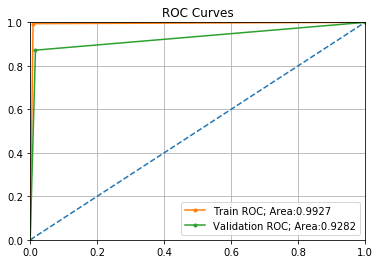

In [6]:
knn_ss = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=3))
knn_ss.fit(x_train_sm, y_train_sm)
y_pred = knn_ss.predict(x_train_sm)
y_val_pred = knn_ss.predict(x_val)

report = get_accuracy_vals(y_train_sm, y_pred, y_val, y_val_pred);
models.append("KNN_SCALED")
precision.append(report["1.0"]["precision"])
recall.append(report["1.0"]["recall"])
f1_score.append(report["1.0"]["f1-score"])
accuracy.append(report["accuracy"])
get_roc_curves(y_train_sm, y_pred, y_val, y_val_pred);

## KNN

              precision    recall  f1-score   support

         0.0       0.99      0.96      0.97     56075
         1.0       0.96      0.99      0.98     56075

    accuracy                           0.98    112150
   macro avg       0.98      0.98      0.98    112150
weighted avg       0.98      0.98      0.98    112150

              precision    recall  f1-score   support

         0.0       0.98      0.93      0.95     18678
         1.0       0.40      0.69      0.50      1322

    accuracy                           0.91     20000
   macro avg       0.69      0.81      0.73     20000
weighted avg       0.94      0.91      0.92     20000



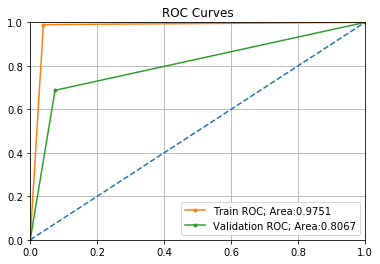

In [7]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_sm, y_train_sm)
y_pred = knn.predict(x_train_sm)
y_val_pred = knn.predict(x_val)

report = get_accuracy_vals(y_train_sm, y_pred, y_val, y_val_pred);
models.append("KNN")
precision.append(report["1.0"]["precision"])
recall.append(report["1.0"]["recall"])
f1_score.append(report["1.0"]["f1-score"])
accuracy.append(report["accuracy"])
get_roc_curves(y_train_sm, y_pred, y_val, y_val_pred);

## Decision Tree Classifier

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56075
         1.0       1.00      1.00      1.00     56075

    accuracy                           1.00    112150
   macro avg       1.00      1.00      1.00    112150
weighted avg       1.00      1.00      1.00    112150

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98     18678
         1.0       0.73      0.85      0.79      1322

    accuracy                           0.97     20000
   macro avg       0.86      0.91      0.88     20000
weighted avg       0.97      0.97      0.97     20000



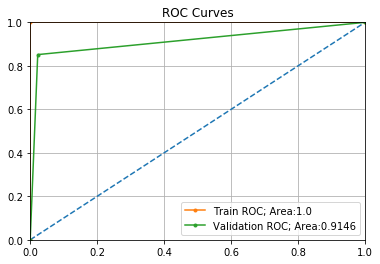

In [8]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=None, min_samples_split=2, splitter='best', random_state=42)
dtc.fit(x_train_sm, y_train_sm)
y_pred = dtc.predict(x_train_sm)
y_val_pred = dtc.predict(x_val)

report = get_accuracy_vals(y_train_sm, y_pred, y_val, y_val_pred);
models.append("DECISIONTREE")
precision.append(report["1.0"]["precision"])
recall.append(report["1.0"]["recall"])
f1_score.append(report["1.0"]["f1-score"])
accuracy.append(report["accuracy"])
get_roc_curves(y_train_sm, y_pred, y_val, y_val_pred);

## Random Forest Classifier

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56075
         1.0       1.00      1.00      1.00     56075

    accuracy                           1.00    112150
   macro avg       1.00      1.00      1.00    112150
weighted avg       1.00      1.00      1.00    112150

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     18678
         1.0       0.87      0.86      0.86      1322

    accuracy                           0.98     20000
   macro avg       0.93      0.93      0.93     20000
weighted avg       0.98      0.98      0.98     20000



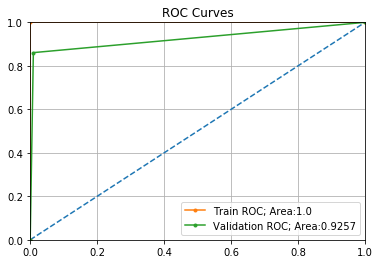

In [9]:
rf = RandomForestClassifier(max_depth=None, min_samples_split=2, random_state=42)
rf.fit(x_train_sm, y_train_sm)
y_pred = rf.predict(x_train_sm)
y_val_pred = rf.predict(x_val)

report = get_accuracy_vals(y_train_sm, y_pred, y_val, y_val_pred);
models.append("RF")
precision.append(report["1.0"]["precision"])
recall.append(report["1.0"]["recall"])
f1_score.append(report["1.0"]["f1-score"])
accuracy.append(report["accuracy"])
get_roc_curves(y_train_sm, y_pred, y_val, y_val_pred);

## MLP Classifier, with StandardScaler

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99     56075
         1.0       0.99      0.98      0.99     56075

    accuracy                           0.99    112150
   macro avg       0.99      0.99      0.99    112150
weighted avg       0.99      0.99      0.99    112150

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     18678
         1.0       0.90      0.91      0.91      1322

    accuracy                           0.99     20000
   macro avg       0.95      0.95      0.95     20000
weighted avg       0.99      0.99      0.99     20000



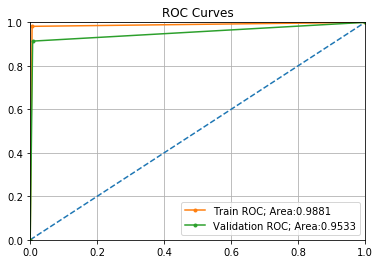

In [10]:
mlp_ss_esf = make_pipeline(StandardScaler(), MLPClassifier(early_stopping=False, hidden_layer_sizes=(100,), learning_rate='adaptive', max_iter=1000, random_state=42))
mlp_ss_esf.fit(x_train_sm, y_train_sm)
y_pred = mlp_ss_esf.predict(x_train_sm)
y_val_pred = mlp_ss_esf.predict(x_val)

report = get_accuracy_vals(y_train_sm, y_pred, y_val, y_val_pred);
models.append("MLP_SCALED")
precision.append(report["1.0"]["precision"])
recall.append(report["1.0"]["recall"])
f1_score.append(report["1.0"]["f1-score"])
accuracy.append(report["accuracy"])
get_roc_curves(y_train_sm, y_pred, y_val, y_val_pred);

## MLP Classifier

              precision    recall  f1-score   support

         0.0       0.86      0.88      0.87     56075
         1.0       0.87      0.86      0.87     56075

    accuracy                           0.87    112150
   macro avg       0.87      0.87      0.87    112150
weighted avg       0.87      0.87      0.87    112150

              precision    recall  f1-score   support

         0.0       0.98      0.88      0.93     18678
         1.0       0.31      0.80      0.45      1322

    accuracy                           0.87     20000
   macro avg       0.65      0.84      0.69     20000
weighted avg       0.94      0.87      0.90     20000



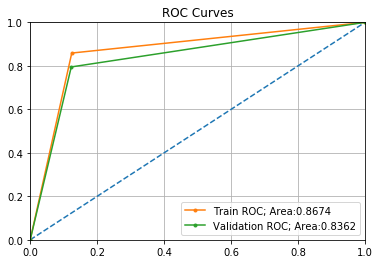

In [11]:
mlp_est = MLPClassifier(early_stopping=True, hidden_layer_sizes=(100,), learning_rate='adaptive', random_state=42)
mlp_est.fit(x_train_sm, y_train_sm)
y_pred = mlp_est.predict(x_train_sm)
y_val_pred = mlp_est.predict(x_val)

report = get_accuracy_vals(y_train_sm, y_pred, y_val, y_val_pred);
models.append("MLP")
precision.append(report["1.0"]["precision"])
recall.append(report["1.0"]["recall"])
f1_score.append(report["1.0"]["f1-score"])
accuracy.append(report["accuracy"])
get_roc_curves(y_train_sm, y_pred, y_val, y_val_pred);

## AdaBoost, with StandardScaler

              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93     56075
         1.0       0.94      0.92      0.93     56075

    accuracy                           0.93    112150
   macro avg       0.93      0.93      0.93    112150
weighted avg       0.93      0.93      0.93    112150

              precision    recall  f1-score   support

         0.0       0.99      0.94      0.96     18678
         1.0       0.50      0.80      0.62      1322

    accuracy                           0.93     20000
   macro avg       0.74      0.87      0.79     20000
weighted avg       0.95      0.93      0.94     20000



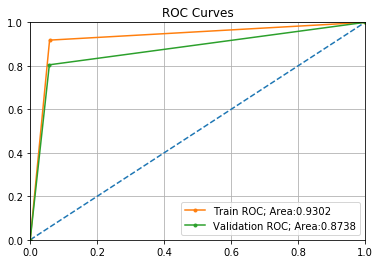

In [12]:
ada_ss = make_pipeline(StandardScaler(), AdaBoostClassifier(algorithm='SAMME.R', random_state=42))
ada_ss.fit(x_train_sm, y_train_sm)
y_pred = ada_ss.predict(x_train_sm)
y_val_pred = ada_ss.predict(x_val)

report = get_accuracy_vals(y_train_sm, y_pred, y_val, y_val_pred);
models.append("ADABOOST_SCALED")
precision.append(report["1.0"]["precision"])
recall.append(report["1.0"]["recall"])
f1_score.append(report["1.0"]["f1-score"])
accuracy.append(report["accuracy"])
get_roc_curves(y_train_sm, y_pred, y_val, y_val_pred);

## AdaBoost

              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93     56075
         1.0       0.94      0.92      0.93     56075

    accuracy                           0.93    112150
   macro avg       0.93      0.93      0.93    112150
weighted avg       0.93      0.93      0.93    112150

              precision    recall  f1-score   support

         0.0       0.99      0.94      0.96     18678
         1.0       0.50      0.80      0.62      1322

    accuracy                           0.93     20000
   macro avg       0.74      0.87      0.79     20000
weighted avg       0.95      0.93      0.94     20000



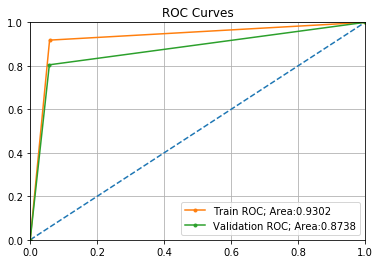

In [13]:
ada = AdaBoostClassifier(algorithm='SAMME.R', random_state=42)
ada.fit(x_train_sm, y_train_sm)
y_pred = ada.predict(x_train_sm)
y_val_pred = ada.predict(x_val)

report = get_accuracy_vals(y_train_sm, y_pred, y_val, y_val_pred);
models.append("ADABOOST")
precision.append(report["1.0"]["precision"])
recall.append(report["1.0"]["recall"])
f1_score.append(report["1.0"]["f1-score"])
accuracy.append(report["accuracy"])
get_roc_curves(y_train_sm, y_pred, y_val, y_val_pred);

## Gradient Boosting, with StandardScaler

              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96     56075
         1.0       0.98      0.95      0.96     56075

    accuracy                           0.96    112150
   macro avg       0.96      0.96      0.96    112150
weighted avg       0.96      0.96      0.96    112150

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98     18678
         1.0       0.72      0.85      0.78      1322

    accuracy                           0.97     20000
   macro avg       0.85      0.91      0.88     20000
weighted avg       0.97      0.97      0.97     20000



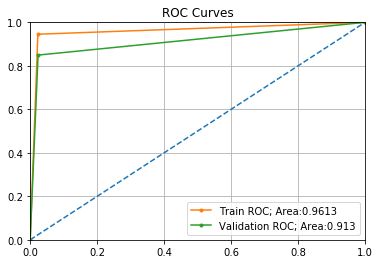

In [14]:
gb_ss = make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=42))
gb_ss.fit(x_train_sm, y_train_sm)
y_pred = gb_ss.predict(x_train_sm)
y_val_pred = gb_ss.predict(x_val)

report = get_accuracy_vals(y_train_sm, y_pred, y_val, y_val_pred);
models.append("GRADIENTBOOSTING_SCALED")
precision.append(report["1.0"]["precision"])
recall.append(report["1.0"]["recall"])
f1_score.append(report["1.0"]["f1-score"])
accuracy.append(report["accuracy"])
get_roc_curves(y_train_sm, y_pred, y_val, y_val_pred);

## Gradient Boosting

              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96     56075
         1.0       0.98      0.95      0.96     56075

    accuracy                           0.96    112150
   macro avg       0.96      0.96      0.96    112150
weighted avg       0.96      0.96      0.96    112150

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98     18678
         1.0       0.72      0.85      0.78      1322

    accuracy                           0.97     20000
   macro avg       0.85      0.91      0.88     20000
weighted avg       0.97      0.97      0.97     20000



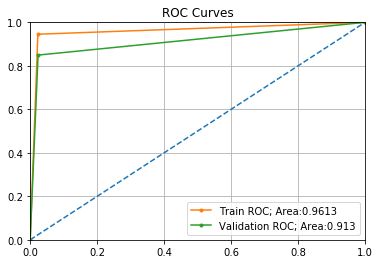

In [15]:
gb = GradientBoostingClassifier(random_state=42)
gb.fit(x_train_sm, y_train_sm)
y_pred = gb.predict(x_train_sm)
y_val_pred = gb.predict(x_val)

report = get_accuracy_vals(y_train_sm, y_pred, y_val, y_val_pred);
models.append("GRADIENTBOOSTING")
precision.append(report["1.0"]["precision"])
recall.append(report["1.0"]["recall"])
f1_score.append(report["1.0"]["f1-score"])
accuracy.append(report["accuracy"])
get_roc_curves(y_train_sm, y_pred, y_val, y_val_pred);

## SGDClassifier, with StandardScaler

              precision    recall  f1-score   support

         0.0       0.87      0.90      0.88     56075
         1.0       0.89      0.86      0.88     56075

    accuracy                           0.88    112150
   macro avg       0.88      0.88      0.88    112150
weighted avg       0.88      0.88      0.88    112150

              precision    recall  f1-score   support

         0.0       0.98      0.89      0.94     18678
         1.0       0.34      0.78      0.47      1322

    accuracy                           0.88     20000
   macro avg       0.66      0.83      0.70     20000
weighted avg       0.94      0.88      0.90     20000



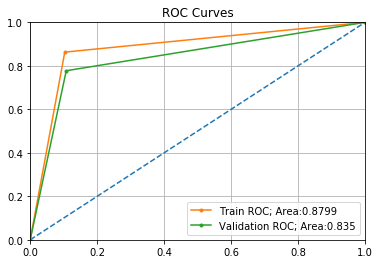

In [16]:
sgd_ss = make_pipeline(StandardScaler(), SGDClassifier(eta0=0.5, learning_rate='adaptive', penalty='l2', random_state=42))
sgd_ss.fit(x_train_sm, y_train_sm)
y_pred = sgd_ss.predict(x_train_sm)
y_val_pred = sgd_ss.predict(x_val)

report = get_accuracy_vals(y_train_sm, y_pred, y_val, y_val_pred);
models.append("SGD_SCALED")
precision.append(report["1.0"]["precision"])
recall.append(report["1.0"]["recall"])
f1_score.append(report["1.0"]["f1-score"])
accuracy.append(report["accuracy"])
get_roc_curves(y_train_sm, y_pred, y_val, y_val_pred);

## SGDClassifier

              precision    recall  f1-score   support

         0.0       0.80      0.82      0.81     56075
         1.0       0.81      0.79      0.80     56075

    accuracy                           0.81    112150
   macro avg       0.81      0.81      0.80    112150
weighted avg       0.81      0.81      0.80    112150

              precision    recall  f1-score   support

         0.0       0.98      0.82      0.89     18678
         1.0       0.24      0.79      0.37      1322

    accuracy                           0.82     20000
   macro avg       0.61      0.81      0.63     20000
weighted avg       0.93      0.82      0.86     20000



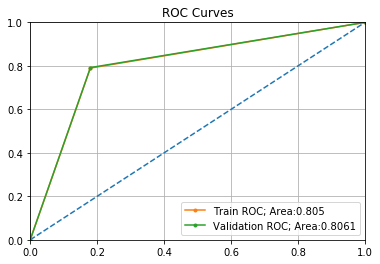

In [17]:
sgd = SGDClassifier(eta0=0.5, learning_rate='adaptive', penalty='l2', random_state=42)
sgd.fit(x_train_sm, y_train_sm)
y_pred = sgd.predict(x_train_sm)
y_val_pred = sgd.predict(x_val)

report = get_accuracy_vals(y_train_sm, y_pred, y_val, y_val_pred);
models.append("SGD")
precision.append(report["1.0"]["precision"])
recall.append(report["1.0"]["recall"])
f1_score.append(report["1.0"]["f1-score"])
accuracy.append(report["accuracy"])
get_roc_curves(y_train_sm, y_pred, y_val, y_val_pred);

## GaussianNB

              precision    recall  f1-score   support

         0.0       0.86      0.92      0.89     56075
         1.0       0.91      0.85      0.88     56075

    accuracy                           0.88    112150
   macro avg       0.88      0.88      0.88    112150
weighted avg       0.88      0.88      0.88    112150

              precision    recall  f1-score   support

         0.0       0.98      0.92      0.95     18678
         1.0       0.41      0.78      0.54      1322

    accuracy                           0.91     20000
   macro avg       0.70      0.85      0.74     20000
weighted avg       0.95      0.91      0.92     20000



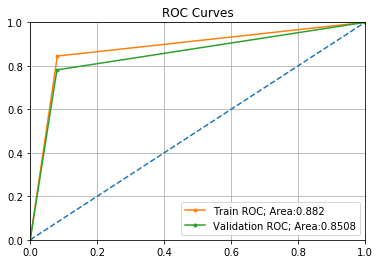

In [18]:
gnb = GaussianNB()
gnb.fit(x_train_sm, y_train_sm)
y_pred = gnb.predict(x_train_sm)
y_val_pred = gnb.predict(x_val)

report = get_accuracy_vals(y_train_sm, y_pred, y_val, y_val_pred);
models.append("GaussianNB")
precision.append(report["1.0"]["precision"])
recall.append(report["1.0"]["recall"])
f1_score.append(report["1.0"]["f1-score"])
accuracy.append(report["accuracy"])
get_roc_curves(y_train_sm, y_pred, y_val, y_val_pred);

## BernoulliNB

              precision    recall  f1-score   support

         0.0       0.65      0.56      0.60     56075
         1.0       0.61      0.70      0.65     56075

    accuracy                           0.63    112150
   macro avg       0.63      0.63      0.62    112150
weighted avg       0.63      0.63      0.62    112150

              precision    recall  f1-score   support

         0.0       0.95      0.56      0.70     18678
         1.0       0.08      0.57      0.15      1322

    accuracy                           0.56     20000
   macro avg       0.52      0.57      0.42     20000
weighted avg       0.89      0.56      0.67     20000



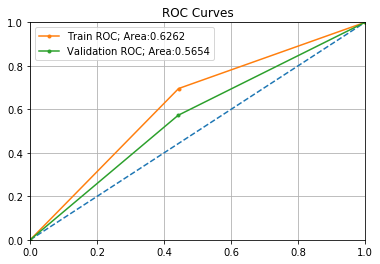

In [19]:
bnb = BernoulliNB()
bnb.fit(x_train_sm, y_train_sm)
y_pred = bnb.predict(x_train_sm)
y_val_pred = bnb.predict(x_val)

report = get_accuracy_vals(y_train_sm, y_pred, y_val, y_val_pred);
models.append("BernoulliNB")
precision.append(report["1.0"]["precision"])
recall.append(report["1.0"]["recall"])
f1_score.append(report["1.0"]["f1-score"])
accuracy.append(report["accuracy"])
get_roc_curves(y_train_sm, y_pred, y_val, y_val_pred);

## LDA, with StandardScaler

              precision    recall  f1-score   support

         0.0       0.84      0.93      0.88     56075
         1.0       0.92      0.82      0.87     56075

    accuracy                           0.87    112150
   macro avg       0.88      0.87      0.87    112150
weighted avg       0.88      0.87      0.87    112150

              precision    recall  f1-score   support

         0.0       0.98      0.93      0.95     18678
         1.0       0.41      0.71      0.52      1322

    accuracy                           0.91     20000
   macro avg       0.69      0.82      0.74     20000
weighted avg       0.94      0.91      0.92     20000



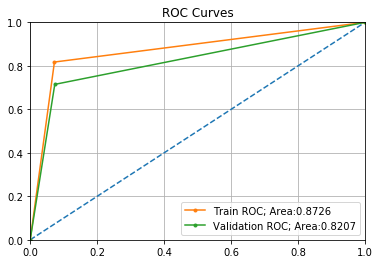

In [20]:
lda_ss = make_pipeline(StandardScaler(), LinearDiscriminantAnalysis())
lda_ss.fit(x_train_sm, y_train_sm)
y_pred = lda_ss.predict(x_train_sm)
y_val_pred = lda_ss.predict(x_val)

report = get_accuracy_vals(y_train_sm, y_pred, y_val, y_val_pred);
models.append("LDA_SCALED")
precision.append(report["1.0"]["precision"])
recall.append(report["1.0"]["recall"])
f1_score.append(report["1.0"]["f1-score"])
accuracy.append(report["accuracy"])
get_roc_curves(y_train_sm, y_pred, y_val, y_val_pred);

## LDA

              precision    recall  f1-score   support

         0.0       0.84      0.93      0.88     56075
         1.0       0.92      0.82      0.87     56075

    accuracy                           0.87    112150
   macro avg       0.88      0.87      0.87    112150
weighted avg       0.88      0.87      0.87    112150

              precision    recall  f1-score   support

         0.0       0.98      0.93      0.95     18678
         1.0       0.41      0.71      0.52      1322

    accuracy                           0.91     20000
   macro avg       0.69      0.82      0.74     20000
weighted avg       0.94      0.91      0.92     20000



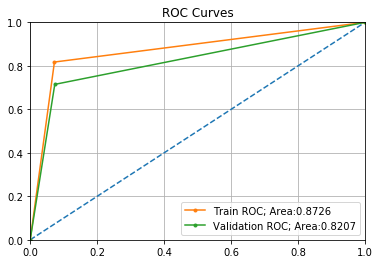

In [21]:
lda = LinearDiscriminantAnalysis()
lda.fit(x_train_sm, y_train_sm)
y_pred = lda.predict(x_train_sm)
y_val_pred = lda.predict(x_val)

report = get_accuracy_vals(y_train_sm, y_pred, y_val, y_val_pred);
models.append("LDA")
precision.append(report["1.0"]["precision"])
recall.append(report["1.0"]["recall"])
f1_score.append(report["1.0"]["f1-score"])
accuracy.append(report["accuracy"])
get_roc_curves(y_train_sm, y_pred, y_val, y_val_pred);

## SVM, with Standard Scaler

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98     56075
         1.0       0.99      0.97      0.98     56075

    accuracy                           0.98    112150
   macro avg       0.98      0.98      0.98    112150
weighted avg       0.98      0.98      0.98    112150

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     18678
         1.0       0.88      0.88      0.88      1322

    accuracy                           0.98     20000
   macro avg       0.94      0.94      0.94     20000
weighted avg       0.98      0.98      0.98     20000



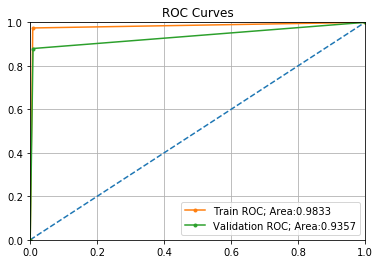

In [22]:
svm_ss = make_pipeline(StandardScaler(), SVC(C=500, gamma="scale", random_state=42))
svm_ss.fit(x_train_sm, y_train_sm)
y_pred = svm_ss.predict(x_train_sm)
y_val_pred = svm_ss.predict(x_val)

report = get_accuracy_vals(y_train_sm, y_pred, y_val, y_val_pred);
models.append("SVM_SCALED")
precision.append(report["1.0"]["precision"])
recall.append(report["1.0"]["recall"])
f1_score.append(report["1.0"]["f1-score"])
accuracy.append(report["accuracy"])
get_roc_curves(y_train_sm, y_pred, y_val, y_val_pred);

## SVM

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98     56075
         1.0       0.99      0.97      0.98     56075

    accuracy                           0.98    112150
   macro avg       0.98      0.98      0.98    112150
weighted avg       0.98      0.98      0.98    112150

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     18678
         1.0       0.88      0.89      0.88      1322

    accuracy                           0.98     20000
   macro avg       0.94      0.94      0.94     20000
weighted avg       0.98      0.98      0.98     20000



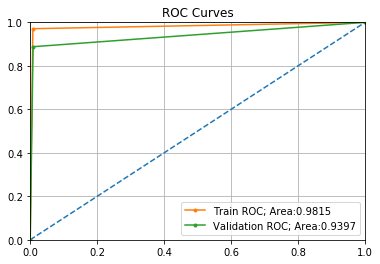

In [23]:
svm = make_pipeline(StandardScaler(), SVC(C=100, gamma="auto", random_state=42))
svm.fit(x_train_sm, y_train_sm)
y_pred = svm.predict(x_train_sm)
y_val_pred = svm.predict(x_val)

report = get_accuracy_vals(y_train_sm, y_pred, y_val, y_val_pred);
models.append("SVM")
precision.append(report["1.0"]["precision"])
recall.append(report["1.0"]["recall"])
f1_score.append(report["1.0"]["f1-score"])
accuracy.append(report["accuracy"])
get_roc_curves(y_train_sm, y_pred, y_val, y_val_pred);

## ExtraTreesClassifier

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56075
         1.0       1.00      1.00      1.00     56075

    accuracy                           1.00    112150
   macro avg       1.00      1.00      1.00    112150
weighted avg       1.00      1.00      1.00    112150

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     18678
         1.0       0.90      0.85      0.87      1322

    accuracy                           0.98     20000
   macro avg       0.94      0.92      0.93     20000
weighted avg       0.98      0.98      0.98     20000



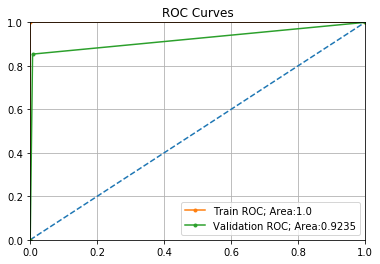

In [24]:
etc = ExtraTreesClassifier(random_state=42)
etc.fit(x_train_sm, y_train_sm)
y_pred = etc.predict(x_train_sm)
y_val_pred = etc.predict(x_val)

report = get_accuracy_vals(y_train_sm, y_pred, y_val, y_val_pred);
models.append("ExtraTrees")
precision.append(report["1.0"]["precision"])
recall.append(report["1.0"]["recall"])
f1_score.append(report["1.0"]["f1-score"])
accuracy.append(report["accuracy"])
get_roc_curves(y_train_sm, y_pred, y_val, y_val_pred);

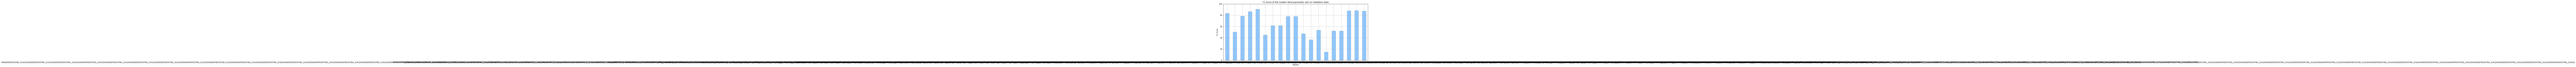

In [25]:
df = pd.DataFrame()
df["Models"] = models
df["Precision"] = precision
df["Recall"] = recall
df["F1-Score"] = f1_score
df["Accuracy"] = accuracy

df["Models"] = df["Models"]*100
df["Precision"] = df["Precision"]*100
df["Recall"] = df["Recall"]*100
df["F1-Score"] = df["F1-Score"]*100
df["Accuracy"] = df["Accuracy"]*100

df.sort_values(by=["F1-Score"], inplace=True)
df.plot.bar(x="Models", y="F1-Score", color="dodgerblue", alpha=0.5, edgecolor="darkslategray", 
            title="F1 Score of the models (best parameter set) on Validation data", legend=False, 
            figsize=[15,6], rot=0, grid=True, ylim=[0,100])
plt.ylabel("F1 Score")
plt.show()

In [26]:
df

,Models,Precision,Recall,F1-Score,Accuracy
0,KNN_SCALEDKNN_SCALEDKNN_SCALEDKNN_SCALEDKNN_SC...,79.682101,87.216339,83.279162,97.685
1,KNNKNNKNNKNNKNNKNNKNNKNNKNNKNNKNNKNNKNNKNNKNNK...,39.590592,68.759455,50.248756,91.000
2,DECISIONTREEDECISIONTREEDECISIONTREEDECISIONTR...,72.833118,85.173979,78.521618,96.920
3,RFRFRFRFRFRFRFRFRFRFRFRFRFRFRFRFRFRFRFRFRFRFRF...,86.605784,86.081694,86.342944,98.200
4,MLP_SCALEDMLP_SCALEDMLP_SCALEDMLP_SCALEDMLP_SC...,89.947878,91.376702,90.656660,98.755
5,MLPMLPMLPMLPMLPMLPMLPMLPMLPMLPMLPMLPMLPMLPMLPM...,31.448235,79.500756,45.068611,87.190
6,ADABOOST_SCALEDADABOOST_SCALEDADABOOST_SCALEDA...,49.906191,80.484115,61.609728,93.370
7,ADABOOSTADABOOSTADABOOSTADABOOSTADABOOSTADABOO...,49.906191,80.484115,61.609728,93.370
8,GRADIENTBOOSTING_SCALEDGRADIENTBOOSTING_SCALED...,71.941063,84.947050,77.904960,96.815
9,GRADIENTBOOSTINGGRADIENTBOOSTINGGRADIENTBOOSTI...,71.941063,84.947050,77.904960,96.815


# Ensemble Classifiers

In [27]:
ensemble_models = []
ensemble_precision = []
ensemble_recall = []
ensemble_f1 = []
ensemble_accuracy = []

## Stacking Classifier

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56075
         1.0       1.00      1.00      1.00     56075

    accuracy                           1.00    112150
   macro avg       1.00      1.00      1.00    112150
weighted avg       1.00      1.00      1.00    112150

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     18678
         1.0       0.91      0.90      0.91      1322

    accuracy                           0.99     20000
   macro avg       0.95      0.95      0.95     20000
weighted avg       0.99      0.99      0.99     20000



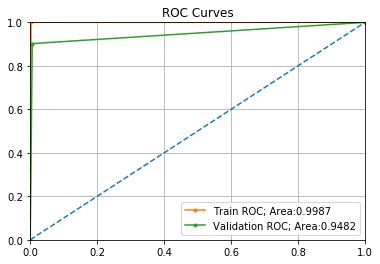

In [28]:
estimators = [('svm_ss', svm_ss), ('knn_ss', knn_ss), ('rf', rf), 
              ('mlp_ss_esf', mlp_ss_esf), ('etc', etc)]
stack = StackingClassifier(estimators=estimators, final_estimator=mlp_ss_esf)
stack.fit(x_train_sm, y_train_sm)
y_pred = stack.predict(x_train_sm)
y_val_pred = stack.predict(x_val)

report = get_accuracy_vals(y_train_sm, y_pred, y_val, y_val_pred);
ensemble_models.append("STACKING")
ensemble_precision.append(report["1.0"]["precision"])
ensemble_recall.append(report["1.0"]["recall"])
ensemble_f1.append(report["1.0"]["f1-score"])
ensemble_accuracy.append(report["accuracy"])
get_roc_curves(y_train_sm, y_pred, y_val, y_val_pred);

## Voting Classifier

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56075
         1.0       1.00      1.00      1.00     56075

    accuracy                           1.00    112150
   macro avg       1.00      1.00      1.00    112150
weighted avg       1.00      1.00      1.00    112150

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     18678
         1.0       0.89      0.89      0.89      1322

    accuracy                           0.99     20000
   macro avg       0.94      0.94      0.94     20000
weighted avg       0.99      0.99      0.99     20000



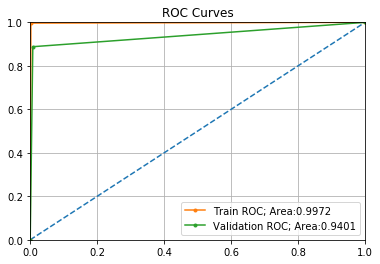

In [29]:
from sklearn.ensemble import VotingClassifier
estimators = [('svm_ss', make_pipeline(StandardScaler(), SVC(C=50, random_state=42, probability=True))), 
              ('knn_ss', knn_ss), ('rf', rf), 
              ('mlp_ss_esf', mlp_ss_esf), ('etc', etc)]
voting = VotingClassifier(estimators=estimators, voting='soft')
voting.fit(x_train_sm, y_train_sm)
y_pred = voting.predict(x_train_sm)
y_val_pred = voting.predict(x_val)

report = get_accuracy_vals(y_train_sm, y_pred, y_val, y_val_pred);
ensemble_models.append("VOTING_SOFT")
ensemble_precision.append(report["1.0"]["precision"])
ensemble_recall.append(report["1.0"]["recall"])
ensemble_f1.append(report["1.0"]["f1-score"])
ensemble_accuracy.append(report["accuracy"])
get_roc_curves(y_train_sm, y_pred, y_val, y_val_pred);

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56075
         1.0       1.00      1.00      1.00     56075

    accuracy                           1.00    112150
   macro avg       1.00      1.00      1.00    112150
weighted avg       1.00      1.00      1.00    112150

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     18678
         1.0       0.89      0.88      0.88      1322

    accuracy                           0.98     20000
   macro avg       0.94      0.94      0.94     20000
weighted avg       0.98      0.98      0.98     20000



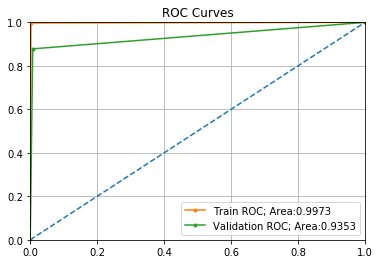

In [30]:
from sklearn.ensemble import VotingClassifier
estimators = [('svm_ss', make_pipeline(StandardScaler(), SVC(C=50, random_state=42, probability=True))), 
              ('knn_ss', knn_ss), ('rf', rf), 
              ('mlp_ss_esf', mlp_ss_esf), ('etc', etc)]
voting = VotingClassifier(estimators=estimators, voting='hard')
voting.fit(x_train_sm, y_train_sm)
y_pred = voting.predict(x_train_sm)
y_val_pred = voting.predict(x_val)

report = get_accuracy_vals(y_train_sm, y_pred, y_val, y_val_pred);
ensemble_models.append("VOTING_HARD")
ensemble_precision.append(report["1.0"]["precision"])
ensemble_recall.append(report["1.0"]["recall"])
ensemble_f1.append(report["1.0"]["f1-score"])
ensemble_accuracy.append(report["accuracy"])
get_roc_curves(y_train_sm, y_pred, y_val, y_val_pred);

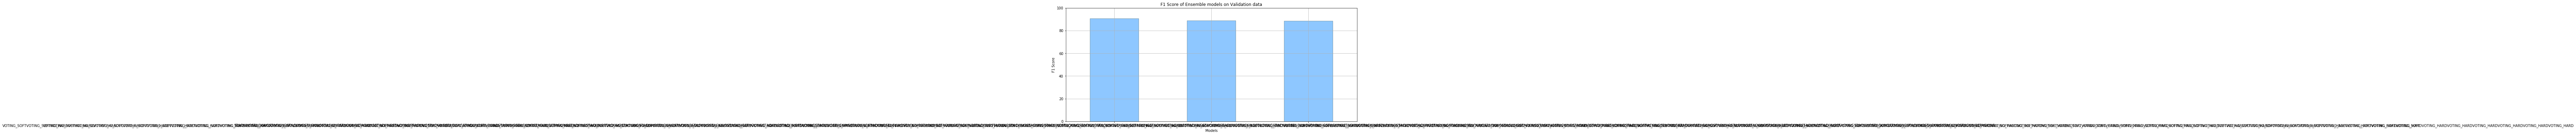

In [31]:
ensemble_df = pd.DataFrame()
ensemble_df["Models"] = ensemble_models
ensemble_df["Precision"] = ensemble_precision
ensemble_df["Recall"] = ensemble_recall
ensemble_df["F1-Score"] = ensemble_f1
ensemble_df["Accuracy"] = ensemble_accuracy

ensemble_df["Models"] = ensemble_df["Models"]*100
ensemble_df["Precision"] = ensemble_df["Precision"]*100
ensemble_df["Recall"] = ensemble_df["Recall"]*100
ensemble_df["F1-Score"] = ensemble_df["F1-Score"]*100
ensemble_df["Accuracy"] = ensemble_df["Accuracy"]*100

ensemble_df.sort_values(by=["F1-Score"], inplace=True)
ensemble_df.plot.bar(x="Models", y="F1-Score", color="dodgerblue", alpha=0.5, edgecolor="darkslategray", 
            title="F1 Score of Ensemble models on Validation data", legend=False, 
            figsize=[15,6], rot=0, grid=True, ylim=[0,100])
plt.ylabel("F1 Score")
plt.show()

In [32]:
ensemble_df

,Models,Precision,Recall,F1-Score,Accuracy
0,STACKINGSTACKINGSTACKINGSTACKINGSTACKINGSTACKI...,91.347626,90.242057,90.791476,98.790
1,VOTING_SOFTVOTING_SOFTVOTING_SOFTVOTING_SOFTVO...,89.006823,88.804841,88.905718,98.535
2,VOTING_HARDVOTING_HARDVOTING_HARDVOTING_HARDVO...,89.170507,87.821483,88.490854,98.490


## Final model - Stacking Classifier

In [33]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(stack, open(filename, 'wb'))

In [34]:
# load the model from disk
model = pickle.load(open("finalized_model.sav", "rb"))

X_test = pd.read_csv("datasets/test_final.csv", index_col=0)

y_test_pred = model.predict(X_test)
y_test_pred = pd.DataFrame(y_test_pred, columns=["Label"])
y_test_pred.index.name="ID"
y_test_pred["Label"] = y_test_pred["Label"].astype(int)
y_test_pred.to_csv("datasets/pred_y.csv")
y_test_pred

,Label
ID,
0,0
1,0
2,0
3,0
4,0
...,...
19995,1
19996,1
19997,1


## Result Visualization

In [35]:
df.to_csv("datasets/results.csv")
ensemble_df.to_csv("datasets/results_ensemble.csv")

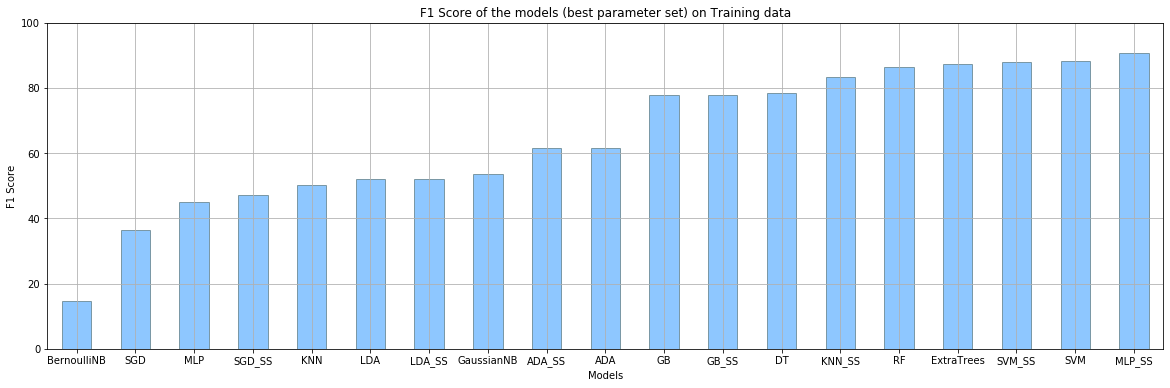

In [36]:
df = pd.read_csv("datasets/results.csv", index_col=0)
df["Models"] = ["KNN_SS", "KNN", "DT", "RF", "MLP_SS", "MLP", "ADA_SS",
                "ADA", "GB_SS", "GB", "SGD_SS", "SGD", 
                "GaussianNB", "BernoulliNB", "LDA_SS", "LDA", "SVM_SS", "SVM", 
                "ExtraTrees"]


df.sort_values(by=["F1-Score"], inplace=True)
df.plot.bar(x="Models", y="F1-Score", color="dodgerblue", alpha=0.5, edgecolor="darkslategray", 
            title="F1 Score of the models (best parameter set) on Training data", legend=False, 
            figsize=[20,6], rot=0, grid=True, ylim=[0,100])
plt.ylabel("F1 Score")
plt.show()

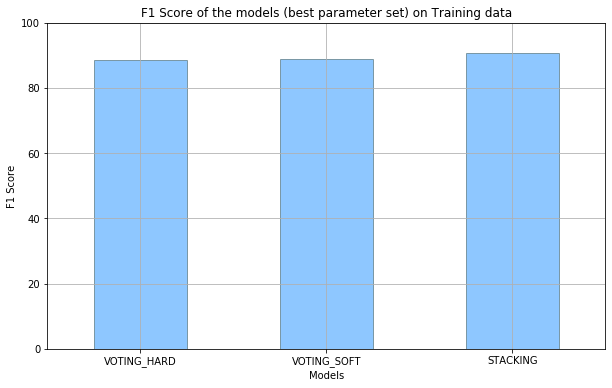

In [37]:
ensemble_df = pd.read_csv("datasets/results_ensemble.csv", index_col=0)
ensemble_df["Models"] = ["STACKING", "VOTING_SOFT", "VOTING_HARD"]
ensemble_df.sort_values(by=["F1-Score"], inplace=True)
ensemble_df.plot.bar(x="Models", y="F1-Score", color="dodgerblue", alpha=0.5, edgecolor="darkslategray", 
            title="F1 Score of the models (best parameter set) on Training data", legend=False, 
            figsize=[10,6], rot=0, grid=True, ylim=[0,100])
plt.ylabel("F1 Score")
plt.show()